A continuación se mencionan los datos estadisticos de las edades en Ternium:
count    20828.000000
mean        39.720424
std         10.120229
min         18.000000
25%         32.000000
50%         39.000000
75%         47.000000
max         71.000000
Name: EDAD, dtype: float64


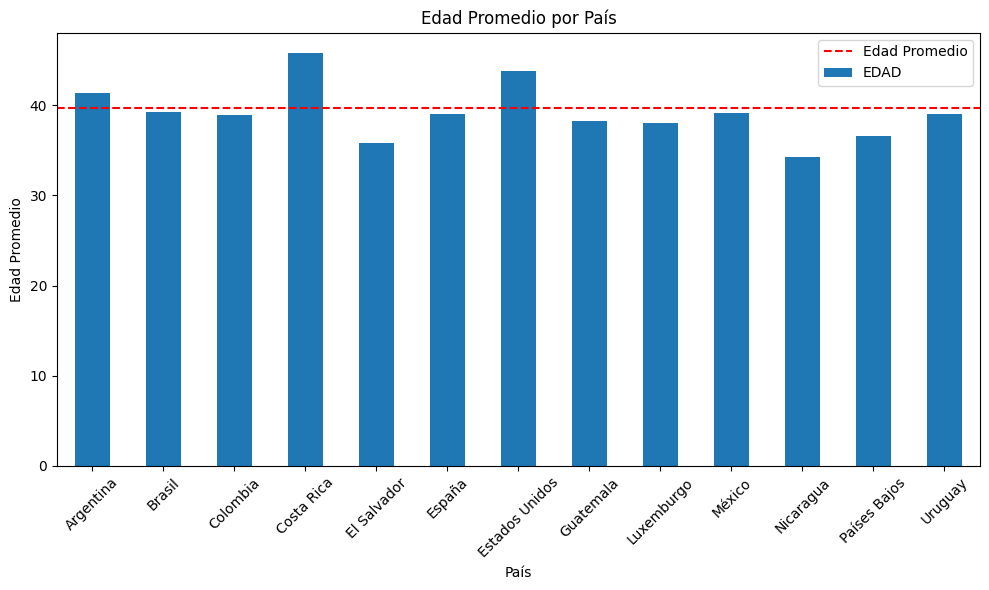

<Figure size 1000x600 with 0 Axes>

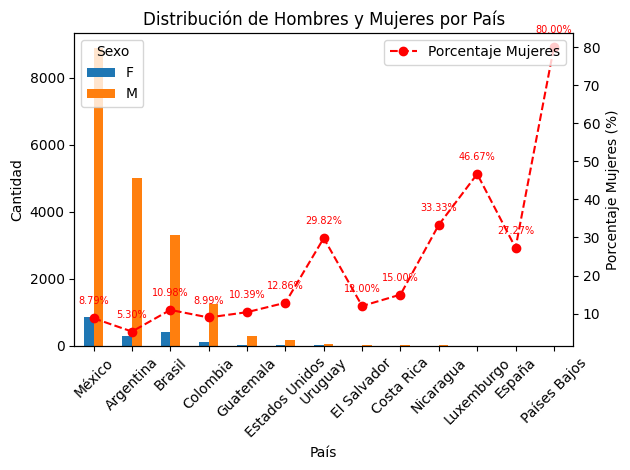

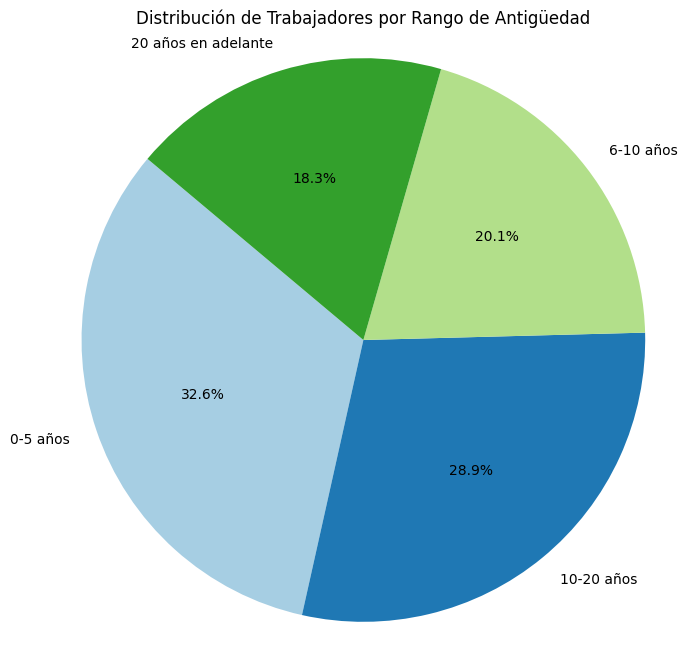

Insights encontrados:
----------------------------------------
Los países que se encuentran por encima de la edad promedio del total son:Argentina, España, Estados Unidos, México, Brasil, Colombia, Guatemala, Costa Rica, El Salvador, Uruguay, Luxemburgo, Nicaragua, Países Bajos
Los 3 países con menor porcentaje de mujeres son:Argentina, México, Colombia
Los 3 países con mayor porcentaje de mujeres son:Países Bajos, Luxemburgo, Nicaragua
El rango de antigüedad con mayor cantidad de trabajadores es '0-5 años'.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
# Leer ruta del archivo
ruta_del_archivo = '/content/HC Jul23.xlsx'

# Leer el archivo .xls y almacenar los datos en un DataFrame
df = pd.read_excel(ruta_del_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
# print(data.head())

#Se Define la columna a trabajar y se escribe la funcion describe para obtener datos estadisticos de la edad de los trabajadores activos
column_name = 'EDAD'
column_stats = df[column_name].describe()
print("A continuación se mencionan los datos estadisticos de las edades en Ternium:")
print(column_stats)

#Se instala libreria matplotlib
!pip install matplotlib

#Calcular la dedad promedio
edad_promedio =df['EDAD'].mean()

#Agrupar por pais y calcular la edad promedio
grupo_paises = df.groupby('RESUMEN UBICACIÓN GEOGRÁFICA')['EDAD'].mean()

#Crear el gráfico de barras
plt.figure(figsize=(10, 6))
grupo_paises.plot(kind='bar')
plt.axhline(y=edad_promedio, color='r', linestyle='--', label='Edad Promedio')
plt.xlabel('País')
plt.ylabel('Edad Promedio')
plt.title('Edad Promedio por País')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

#Mostrar el grafico
plt.show()

# Agrupar por país y sexo, luego contar el número de registros
grupo_pais_sexo = df.groupby(['RESUMEN UBICACIÓN GEOGRÁFICA', 'SEXO']).size().unstack()

# Calcular el porcentaje de trabajadores de sexo femenino sobre el total
grupo_pais_sexo['Porcentaje Mujeres'] = grupo_pais_sexo['F'] / (grupo_pais_sexo['F'] + grupo_pais_sexo['M']) * 100


# Ordenar el DataFrame por la cantidad total de trabajadores
grupo_pais_sexo['Total Trabajadores'] = grupo_pais_sexo['F'] + grupo_pais_sexo['M']
grupo_pais_sexo = grupo_pais_sexo.sort_values(by='Total Trabajadores', ascending=False)

# Crear el gráfico de barras agrupadas (no apiladas) con ordenamiento
plt.figure(figsize=(10, 6))
ax1 = grupo_pais_sexo[['F', 'M']].plot(kind='bar')
ax2 = ax1.twinx()
ax2.plot(grupo_pais_sexo.index, grupo_pais_sexo['Porcentaje Mujeres'], color='r', marker='o', linestyle='--', label='Porcentaje Mujeres')
ax1.set_xlabel('País')
ax1.set_ylabel('Cantidad')
ax2.set_ylabel('Porcentaje Mujeres (%)')
plt.title('Distribución de Hombres y Mujeres por País')
ax1.legend(title='Sexo', loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.tight_layout()

# Agregar etiquetas a cada punto de la línea gráfica
for i, txt in enumerate(grupo_pais_sexo['Porcentaje Mujeres']):
    ax2.annotate(f'{txt:.2f}%', (grupo_pais_sexo.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center', fontsize=7, color='r')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Definir los rangos de antigüedad
def definir_rango_antiguedad(antiguedad):
    if antiguedad >= 0 and antiguedad <= 5:
        return '0-5 años'
    elif antiguedad <= 10:
        return '6-10 años'
    elif antiguedad <= 20:
        return '10-20 años'
    else:
        return '20 años en adelante'

# Aplicar la función para crear la columna de rango de antigüedad
df['Rango Antigüedad'] = df['ANTIGÜEDAD'].apply(definir_rango_antiguedad)

# Contar la cantidad de trabajadores en cada rango de antigüedad
conteo_rangos = df['Rango Antigüedad'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_rangos, labels=conteo_rangos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución de Trabajadores por Rango de Antigüedad')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Redactar insights de los gráficos anteriores

# Calcular el rango de antigüedad con mayor cantidad de trabajadores
rango_antiguedad_mayor_cantidad = df['Rango Antigüedad'].value_counts().idxmax()

# Calcular la edad promedio
edad_promedio_total = df['EDAD'].mean()

# Insights
insight_edad_promedio_paises_arriba = "Los países que se encuentran por encima de la edad promedio del total son:"
paises_arriba = df[df['EDAD'] > edad_promedio_total]['RESUMEN UBICACIÓN GEOGRÁFICA'].unique()
insight_edad_promedio_paises_arriba += ', '.join(paises_arriba)

insight_menor_porcentaje_mujeres = "Los 3 países con menor porcentaje de mujeres son:"
paises_menor_porcentaje_mujeres = grupo_pais_sexo.nsmallest(3, 'Porcentaje Mujeres')['Porcentaje Mujeres'].index.tolist()
insight_menor_porcentaje_mujeres += ', '.join(paises_menor_porcentaje_mujeres)

insight_mayor_porcentaje_mujeres = "Los 3 países con mayor porcentaje de mujeres son:"
paises_mayor_porcentaje_mujeres = grupo_pais_sexo.nlargest(3, 'Porcentaje Mujeres')['Porcentaje Mujeres'].index.tolist()
insight_mayor_porcentaje_mujeres += ', '.join(paises_mayor_porcentaje_mujeres)

insight_rango_antiguedad_mayor_cantidad = f"El rango de antigüedad con mayor cantidad de trabajadores es '{rango_antiguedad_mayor_cantidad}'."

# Imprimir insights
print("Insights encontrados:")
print("-" * 40)
print(insight_edad_promedio_paises_arriba)
print(insight_menor_porcentaje_mujeres)
print(insight_mayor_porcentaje_mujeres)
print(insight_rango_antiguedad_mayor_cantidad)

